In [11]:
#%% read in images in 'sunflower' folder, approach 1
from PIL import Image
path = '/home/hankui/Dropbox/Ongoing/flowers_recognition_hankui/flowers';
jpgfile = Image.open(path + '/sunflower/6953297_8576bf4ea3.jpg') 
print(jpgfile.bits, jpgfile.size, jpgfile.format)


(8, (500, 350), 'JPEG')


In [12]:
import os
os.getcwd()

'/home/hankui/Dropbox/Ongoing/flowers_recognition_hankui/hankui'

In [13]:
#%% read in one image, approach 2
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [14]:
#%% Load an color image in grayscale
img = cv2.imread(path + '/sunflower/6953297_8576bf4ea3.jpg', 0)

In [25]:
#%% display the image
# cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [26]:
#%% define the filter
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)


#%% Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])


#%% Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)


('Filter shape: ', (4, 4))
('Filter 1: \n', array([[-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1]]))


In [15]:
#%% Normalize, rescale entries to lie in [0,1]
gray_img = img.astype("float32")/255


In [16]:
import torch

In [19]:
print(torch.__version__)

1.1.0


In [20]:
torch.cuda.is_available()

False

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
# Neural network with one convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # Returns both layers
        return conv_x, activated_x

In [28]:
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [29]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

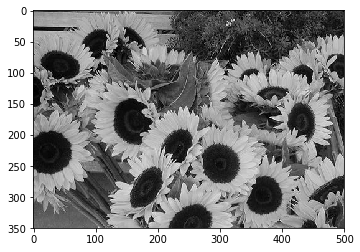

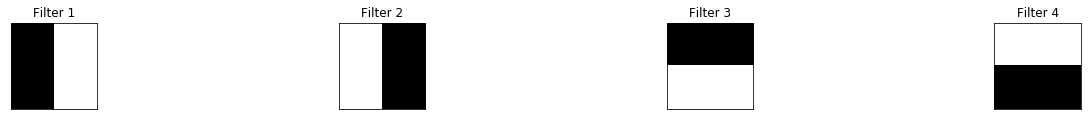

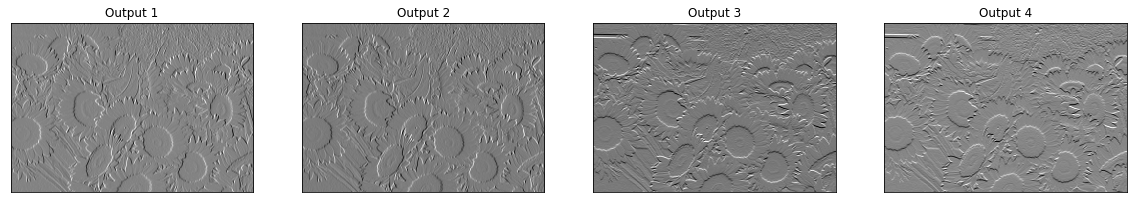

In [31]:
# Plot original image
plt.imshow(gray_img, cmap='gray')

# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# Visualize the output of a convolutional layer
viz_layer(conv_layer)

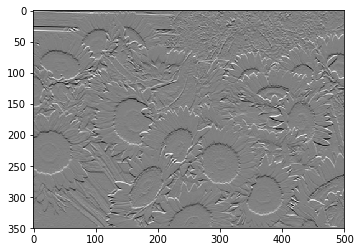

In [33]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray_img, -1, sobel_y)
plt.imshow(filtered_image, cmap='gray')
